## Linear Regression tutorial in Python

### You can find the full tutorial for this code [here on thedataware](http://www.thedataware.com/post/linear-regression-in-python)

In [123]:
# Import the necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.linear_model import LinearRegression

matplotlib.style.use('ggplot')
% matplotlib inline

### First let's generate a synthetic data set. Our data will be generated by the following model:

$$ Y_{i} = \beta_{0} + \beta_{1} X_{i} + \epsilon_{i} $$

Where $ \beta_{0}, \beta_{1} $ are the model parameters, and $ \epsilon_{i} $ is a random error term. We'll assume that $ \epsilon_{i} \sim N(0, \sigma^{2}) $. Thus, we have three parameters, the slope and intercept of the line and the variance of the error term.
Let's generate a data set using the following values and see what happens:

$$ \beta_{0} = -2.81, \beta_{1} = 1.3, \sigma^{2} = 3 $$

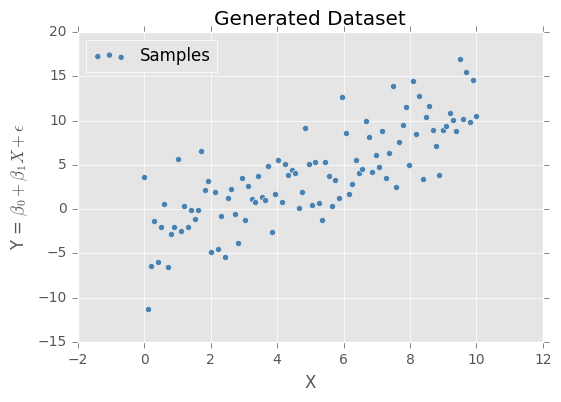

In [124]:
# Data generator parameters

N = 100  # number of samples
mn = 0  # min value of x
mx = 10 # max value of x
beta0 = -2.81  # intercept
beta1 = 1.3  # slope
eps_var = 3  # error variance

X = np.linspace(mn, mx, N)
Y = np.add(np.add(beta0, np.multiply(beta1, X)), np.random.normal(scale=eps_var, size=N))

plt.scatter(X, Y, c='steelblue', label='Samples')
plt.title('Generated Dataset')
plt.xlabel('X')
plt.ylabel('Y = $ \\beta_{0} + \\beta_{1} X + \\epsilon $')
plt.legend(loc=2)

### Now we'll fit a regression line through the data.

In [125]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), Y)
print('Estimated intercept: %.2f , Real intercept: %.2f' % (lr.intercept_, beta0))
print('Estimated slope: %.2f , Real slope: %.2f' % (lr.coef_, beta1))

Estimated intercept: -3.46 , Real intercept: -2.81
Estimated slope: 1.47 , Real slope: 1.30


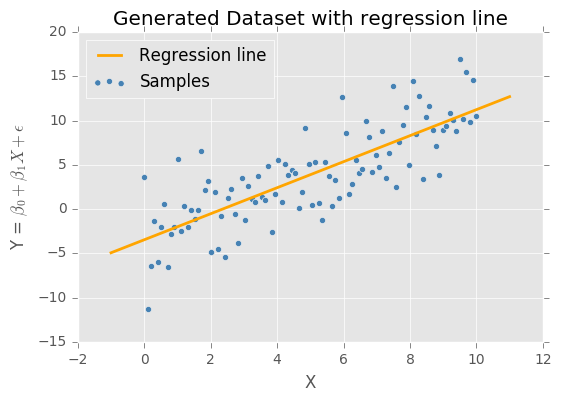

In [127]:
# Let's draw the fitted line through the data to see how it looks

xmin = mn - 1
ymin = np.add(lr.intercept_, np.multiply(lr.coef_, xmin))

xmax = mx + 1
ymax = np.add(lr.intercept_, np.multiply(lr.coef_, xmax))

plt.scatter(X, Y, c='steelblue', label='Samples')
plt.plot([xmin, xmax], [ymin, ymax], 'k-', c='orange', lw=2, label='Regression line')
plt.title('Generated Dataset with regression line')
plt.xlabel('X')
plt.ylabel('Y = $ \\beta_{0} + \\beta_{1} X + \\epsilon $')
plt.legend(loc=2)

#### The regression line fits very well our data set! In fact, the estimated coefficients are really close to the real ones! Let's visualize the errors

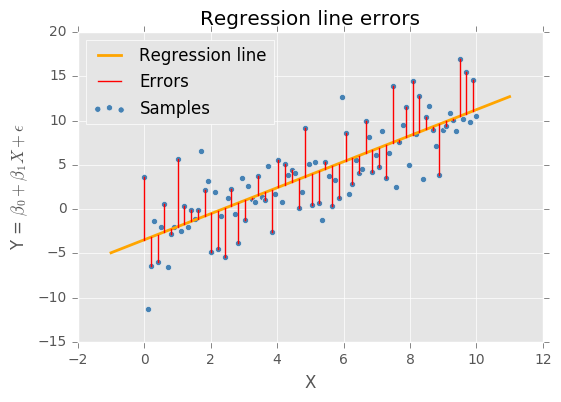

In [131]:
# Let's draw the fitted line plus errors

b0_e = lr.intercept_
b1_e = lr.coef_

xmin = mn - 1
ymin = np.add(b0_e, np.multiply(b1_e, xmin))

xmax = mx + 1
ymax = np.add(b0_e, np.multiply(b1_e, xmax))

plt.scatter(X, Y, c='steelblue', label='Samples')
plt.plot([xmin, xmax], [ymin, ymax], 'k-', c='orange', lw=2, label='Regression line')

# errors 
for i in range(0, len(X), 2):
    yt = Y[i]
    ye = np.add(b0_e, np.multiply(b1_e, X[i]))
    if i == 0:
        plt.plot([X[i], X[i]], [ye, yt], 'k-', c='red', lw=1, label='Errors')
    else:
        plt.plot([X[i], X[i]], [ye, yt], 'k-', c='red', lw=1)

plt.title('Regression line errors')
plt.xlabel('X')
plt.ylabel('Y = $ \\beta_{0} + \\beta_{1} X + \\epsilon $')
plt.legend(loc=2)

#### A problem is that in the real-world we don't know the value of the true coefficients. Thus, we have to find a way to verify the goodness of the coefficients. We can do this by computing confidence intervals for them. That is, we can contruct an interval such that we can be X% confident that the true values of the coefficients lie in that interval.

In [132]:
y_pred = b0_e + (b1_e * X)  # y values predicted by regr. line
y_err = Y - y_pred  # y errors
s_err = np.sum(np.power(y_err, 2))  # sum of squared y errors

def compute_confs(X, s_err, N, alpha):
    t95 = sp.stats.t.ppf(1 - alpha, N-1)  # t-table value for N=99 and conf. level (1-2*alpha)*100%, 2-tailed
    mu_X = np.mean(X)  # mean of X

    confs = t * np.sqrt((s_err / (N-2)) * (1.0 / N + (np.power((X - mu_X), 2)/
                ((np.sum(np.power(X, 2))) - N * (np.power(mu_X, 2))))))

    # lower and upper bounds
    low = y_pred - abs(confs)
    high = y_pred + abs(confs)
    
    return (low, high)

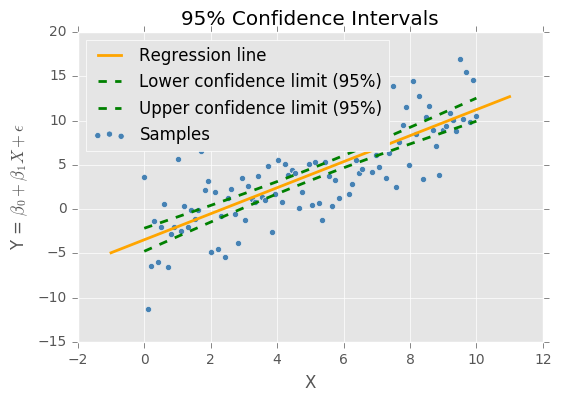

In [133]:
# Let's draw the confidence intervals

low, high = compute_confs(X, s_err, 100, 0.025)

plt.scatter(X, Y, c='steelblue', label='Samples')
plt.plot([xmin, xmax], [ymin, ymax], 'k-', c='orange', lw=2, label='Regression line')
plt.plot(X, low, 'g--', linewidth=2, label='Lower confidence limit (95%)')
plt.plot(X, high, 'g--', linewidth=2, label='Upper confidence limit (95%)')

plt.title('95% Confidence Intervals')
plt.xlabel('X')
plt.ylabel('Y = $ \\beta_{0} + \\beta_{1} X + \\epsilon $')
plt.legend(loc=2)